## Homework

> Note: sometimes your answer doesn't match one of the options exactly. 
> That's fine. 
> Select the option that's closest to your solution.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Dataset

In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

Or you can do it with `wget`:

```bash
wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
```

We need to take `bank/bank-full.csv` file from the downloaded zip-file. Please use semicolon as a separator in the `read_csv` function.

In this dataset our desired target for classification task will be `y` variable - has the client subscribed a term deposit or not. 


In [46]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

--2024-10-17 13:41:28--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip.1’

bank+marketing.zip.     [   <=>              ] 999.85K  1.83MB/s    in 0.5s    

2024-10-17 13:41:29 (1.83 MB/s) - ‘bank+marketing.zip.1’ saved [1023843]



In [2]:
df = pd.read_csv('bank-full.csv', sep = ';')

### Features

For the rest of the homework, you'll need to use only these columns:

* `age`,
* `job`,
* `marital`,
* `education`,
* `balance`,
* `housing`,
* `contact`,
* `day`,
* `month`,
* `duration`,
* `campaign`,
* `pdays`,
* `previous`,
* `poutcome`,
* `y`

### Data preparation

* Select only the features from above.
* Check if the missing values are presented in the features.


In [3]:
features  = ['age', 'job', 'marital', 'education', 'balance','housing', 'contact', 'day', 'month', 'duration', 
             'campaign', 'pdays', 'previous', 'poutcome', 'y']

In [4]:
df = df[features]
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Question 1

What is the most frequent observation (mode) for the column `education`?

- `unknown`
- `primary`
- **`secondary`**
- `tertiary`

In [6]:
df['education'].mode()

0    secondary
Name: education, dtype: object

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `age` and `balance`  0.097783
- `day` and `campaign` 0.162490
- `day` and `pdays`   -0.093044
- **`pdays` and `previous`** 0.454820

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

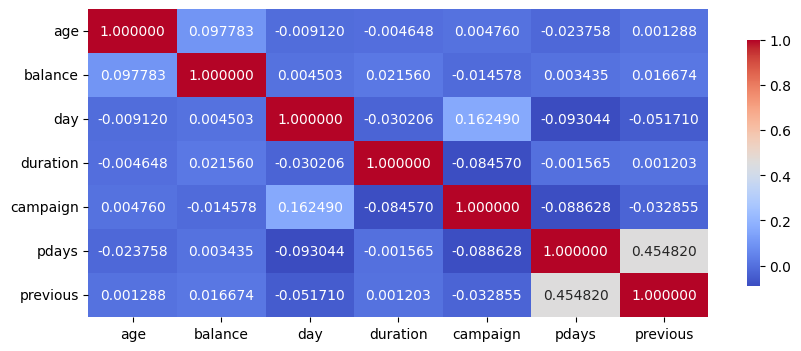

In [8]:
numerical_features = df.select_dtypes(include = 'int64').columns.tolist()

correlation_matrix = df[numerical_features].corr()
plt.figure(figsize = (10,4))
corr = sns.heatmap(correlation_matrix, annot = True, fmt = '.6f', cmap = 'coolwarm', square = False, cbar_kws = {"shrink": .8})
plt.show()

### Target encoding

* Now we want to encode the `y` variable.
* Let's replace the values `yes`/`no` with `1`/`0`.

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.


In [9]:
df['churn'] = (df.y == 'yes').astype(int)
df = df.drop('y', axis=1)

In [10]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,churn
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

In [12]:
def split_data(df, random_state, test_size, val_size):
    df = df.copy()
    df_temp, df_test = train_test_split(df, test_size = test_size, random_state = random_state)
    df_train, df_val = train_test_split(df_temp, test_size = val_size, random_state = random_state)

    y_train = df_train.churn.values
    y_val = df_val.churn.values
    y_test = df_test.churn.values

    df_train = df_train.drop(columns="churn").reset_index(drop=True)
    df_test = df_test.drop(columns="churn").reset_index(drop=True)
    df_val = df_val.drop(columns="churn").reset_index(drop=True)

    return df_train, df_val, df_test, y_train, y_val, y_test

df_train, df_val, df_test, y_train, y_val, y_test = split_data(df, 42, 0.2, 0.25)


### Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `contact`
- `education`
- `housing`
- **`poutcome`**

In [13]:
for col in ['contact', 'education', 'housing', 'poutcome']:
    score = mutual_info_score(y_train, df_train[col])
    print(f"Mutual Information Score of {col} is {round(score,2)}")

Mutual Information Score of contact is 0.01
Mutual Information Score of education is 0.0
Mutual Information Score of housing is 0.01
Mutual Information Score of poutcome is 0.03


### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.6
- 0.7
- 0.8
- **0.9**

In [14]:
categorical_features = df.select_dtypes(include = 'object').columns.tolist()

## do on-hot encoding
df_train_coding = df_train.to_dict(orient = 'records')
df_val_coding  = df_val.to_dict(orient = 'records')

dv = DictVectorizer(sparse = False)
dv.fit(df_train_coding)

X_train = dv.transform(df_train_coding)
X_val = dv.transform(df_val_coding)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred_val = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_val)

print(round(accuracy,2))

0.9


### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model using the same features and parameters as in Q4 (without rounding).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `age`
- `balance`
- `marital`
- **`previous`**

> **Note**: The difference doesn't have to be positive.

In [15]:
elimination_features  = ['age', 'balance', 'marital', 'previous']
accuracy_differences = {}

for column in elimination_features:
    df_train_coding = df_train.drop(column, axis=1)
    df_val_coding = df_val.drop(column, axis=1)
    
    df_train_coding = df_train_coding.to_dict(orient = 'records')
    df_val_coding  = df_val_coding.to_dict(orient = 'records')

    dv = DictVectorizer(sparse = False)
    dv.fit(df_train_coding)

    X_train = dv.transform(df_train_coding)
    X_val = dv.transform(df_val_coding)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred_val = model.predict(X_val)

    new_accuracy = accuracy_score(y_val, y_pred_val)
    difference = accuracy - new_accuracy
    accuracy_differences[column] = difference
    print(f"The difference of {column} is {difference}")

The difference of age is -0.00022119000221187957
The difference of balance is -0.00022119000221187957
The difference of marital is 0.00022119000221187957
The difference of previous is -0.0005529750055297544


In [16]:
min(accuracy_differences.items(), key=lambda item: item[1])

('previous', -0.0005529750055297544)

### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- **0.1**
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.

In [17]:
## do on-hot encoding
df_train_coding = df_train.to_dict(orient = 'records')
df_val_coding  = df_val.to_dict(orient = 'records')

dv = DictVectorizer(sparse = False)
dv.fit(df_train_coding)

X_train = dv.transform(df_train_coding)
X_val = dv.transform(df_val_coding)

for c in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred_val = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred_val)

    print(f"accuracy with parameter C: {c} is {round(accuracy,3)}")

accuracy with parameter C: 0.01 is 0.898
accuracy with parameter C: 0.1 is 0.901
accuracy with parameter C: 1 is 0.901
accuracy with parameter C: 10 is 0.901
accuracy with parameter C: 100 is 0.901
